<a href="https://colab.research.google.com/github/nneomacharity1/Case-Study-CE880/blob/main/Bank_Notes_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation of the Bank Note data and all necessary Libaries





In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

# importing all the classifiers that'll be experimented with
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score


In [8]:
Bank =  pd.read_csv('/content/data_banknote_authentication (1).txt')
Bank

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [9]:
#Naming the column titles for better clarity

Bank.columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Authenticity']
Bank

,Variance,Skewness,Kurtosis,Entropy,Authenticity
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [10]:
#checking for any missing values in the data
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Variance      1371 non-null   float64
 1   Skewness      1371 non-null   float64
 2   Kurtosis      1371 non-null   float64
 3   Entropy       1371 non-null   float64
 4   Authenticity  1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Exploring the Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


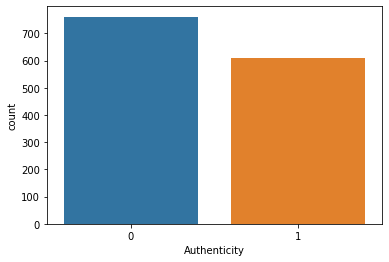

In [11]:
# analyzing the data where 0 represents  "Real" banknotes and 1 represents "Fake" banknotes
sns.countplot(Bank['Authenticity'])

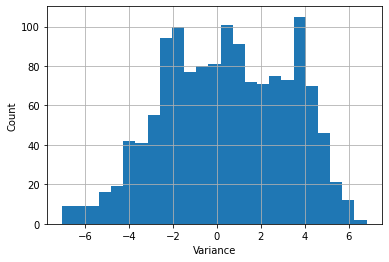

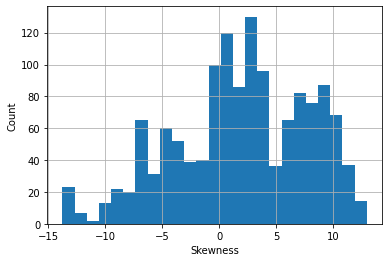

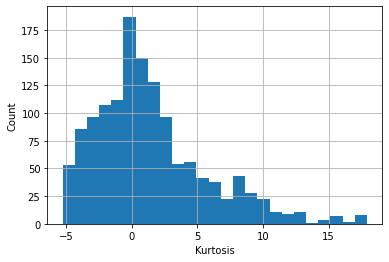

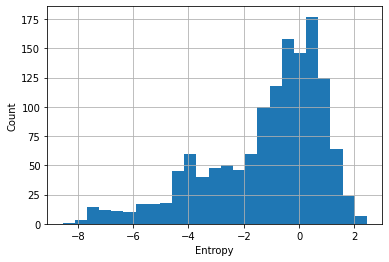

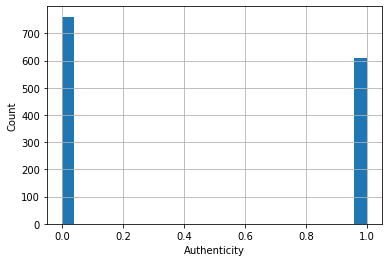

In [12]:
# viewing the distribution plot  using a histogram
for feature in Bank.columns:
  Bank[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()

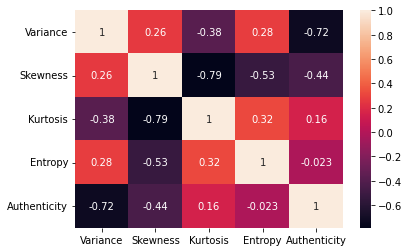

In [13]:
# Looking out for the correlation
sns.heatmap(Bank.corr(),annot=True)

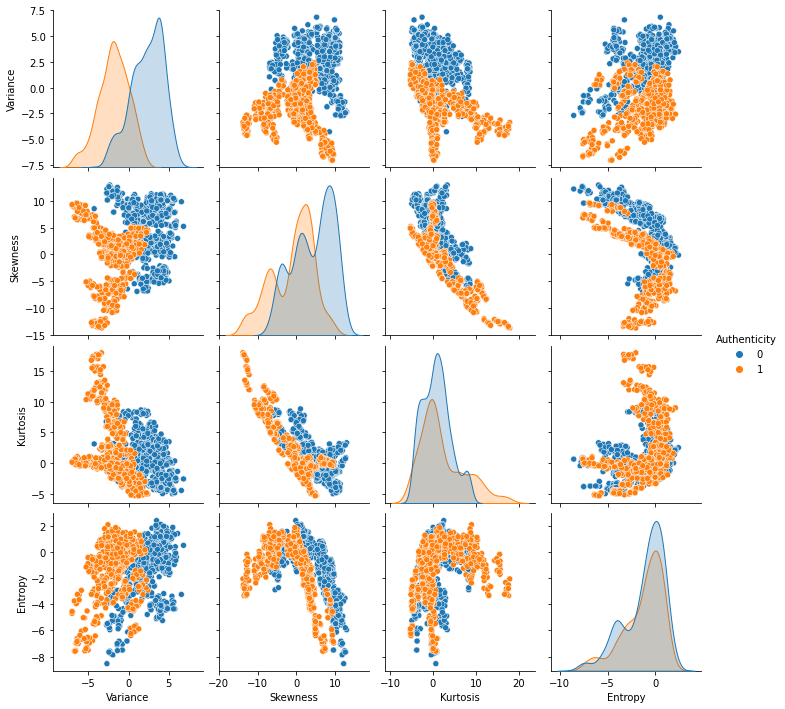

In [14]:
# creating a pairplot to check relationships among each columns with respct to the authenticity column
sns.pairplot(Bank, hue='Authenticity')

Pre-processing of the Data

In [15]:
# checking for outliers
Qr1 = Bank.quantile(0.25)
Qr3 = Bank.quantile(0.75)
IQR = Qr3 - Qr1
Outliers = Bank[(Bank < (Qr1 - 1.5 * IQR)) | (Bank> (Qr3 + 1.5 * IQR))]
Outliers.count()

Variance         0
Skewness         0
Kurtosis        60
Entropy         33
Authenticity     0
dtype: int64

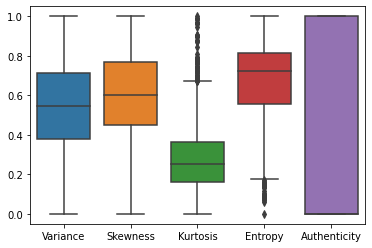

In [28]:
# visualizing the outliers
sns.boxplot(data=Bank)
plt.show()

In [17]:
Scaling= MinMaxScaler()
Bank=pd.DataFrame(Scaling.fit_transform(Bank), index = Bank.index, columns= Bank.columns)

In [18]:
# normalizing the data to be within the rangeof (0.0 to 1.0) using min-max scaler =(x-min(x))/(max(x)-min(x))
Bn = ((Bank-Bank.min()) / (Bank.max() -Bank.min()))
# checking if data has been normalized
(Bn.min(), Bn.max())
Bn

,Variance,Skewness,Kurtosis,Entropy,Authenticity
0,0.835659,0.820982,0.121804,0.644326,0.0
1,0.786629,0.416648,0.310608,0.786951,0.0
2,0.757105,0.871699,0.054921,0.450440,0.0
3,0.531578,0.348662,0.424662,0.687362,0.0
4,0.822859,0.877275,0.057100,0.489711,0.0
...,...,...,...,...,...
1366,0.537124,0.565855,0.165249,0.726398,1.0
1367,0.407690,0.332868,0.506753,0.808350,1.0
1368,0.237385,0.011768,0.985603,0.524755,1.0
1369,0.250842,0.201701,0.761587,0.660675,1.0


In [19]:
# Identifying X as the input columns and Y as the resulting output
X = Bn.drop('Authenticity', axis=1)
Y = Bn['Authenticity']

# Spliting the data into a training and test sets with a 20% ratio for the test size using the train_test_split function 
Trainx, x_test, Trainy, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
# Spliting the current train set into two, resulting to a new train and validation sets
x_train, x_vali, y_train, y_vali = train_test_split(Trainx, Trainy, test_size =0.10)

# Hence: 
# Training Dataset = x_train and y_train 
# Validation Dataset =x_vali and y_vali
# Test dataset = x_test and y_test

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_vali.shape)
print(y_vali.shape)

(986, 4)
(986,)
(275, 4)
(275,)
(110, 4)
(110,)


Building different classification algorithms to test for accuracy


In [22]:
#using a Logistic Regressor
model = LogisticRegression()

# Training the model on the training data
model.fit(x_train, y_train)
# Experimenting the model on the data
accuracyy = model.score(x_train, y_train)
accuracy = model.score(x_test, y_test)
accurac = model.score(x_vali, y_vali)
print(f'Train Accuracy: {accuracyy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Validation Accuracy: {accurac:.2f}')

Train Accuracy: 0.96
Test Accuracy: 0.96
Validation Accuracy: 1.00


In [23]:
#using a decision tree model
model = DecisionTreeClassifier()

# Training the model on the training data
model.fit(x_train, y_train)
# Experimenting the model on the data
accuracyy = model.score(x_train, y_train)
accuracy = model.score(x_test, y_test)
accurac = model.score(x_vali, y_vali)
print(f'Train Accuracy: {accuracyy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Validation Accuracy: {accurac:.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.99
Validation Accuracy: 0.98


In [24]:
#using a Random forest model
model = RandomForestClassifier()

# Training the model on the training data
model.fit(x_train, y_train)

# Experimenting the model on the  data
aaccuracyy = model.score(x_train, y_train)
accuracy = model.score(x_test, y_test)
accurac = model.score(x_vali, y_vali)
print(f'Train Accuracy: {accuracyy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Validation Accuracy: {accurac:.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.99
Validation Accuracy: 1.00


In [25]:
#using a KNN model
model = KNeighborsClassifier()

# Training the model on the training data
model.fit(x_train, y_train)
# Experimenting the model on the data
accuracyy = model.score(x_train, y_train)
accuracy = model.score(x_test, y_test)
accurac = model.score(x_vali, y_vali)
print(f'Train Accuracy: {accuracyy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Validation Accuracy: {accurac:.2f}')


# Making predictions on the test data
y_pred = model.predict(x_test)
# Calculate the precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Train Accuracy: 1.00
Test Accuracy: 1.00
Validation Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [26]:
#using a SVM
model = SVC()

# Training the model on the training data
model.fit(x_train, y_train)
# Experimenting the model on the data
accuracyy = model.score(x_train, y_train)
accuracy = model.score(x_test, y_test)
accurac = model.score(x_vali, y_vali)
print(f'Train Accuracy: {accuracyy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Validation Accuracy: {accurac:.2f}')

# Making predictions on the test data
y_pred = model.predict(x_test)
# Calculate the precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')



Train Accuracy: 1.00
Test Accuracy: 1.00
Validation Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Performance Measurement



In [27]:
knn_confusion_matrix = confusion_matrix(y_test,y_pred) 
print(knn_confusion_matrix)

[[148   0]
 [  0 127]]


In [29]:
score_report = classification_report(y_test, y_pred, target_names=["Class 0","Class 1"])
print(score_report)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       148
     Class 1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

